For the decision tree the sklearn libraries for decision trees are used

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


**Download data**

In [ ]:
data = pd.read_csv('drug200.csv')

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
#Changing the categorical values to numerical ones and creating dummies for Sex (F and M)

dataset = pd.get_dummies(data, columns=['Sex'])

bp_mapping = {'LOW': 0, 'NORMAL': 0.5, 'HIGH': 1}
cholesterol_mapping = {'NORMAL': 0, 'HIGH': 1}

In [ ]:
dataset['BP'] = dataset['BP'].map(bp_mapping)
dataset['Cholesterol'] = dataset['Cholesterol'].map(cholesterol_mapping)

In [ ]:
dataset

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M
0,23,1.0,1,25.355,drugY,1,0
1,47,0.0,1,13.093,drugC,0,1
2,47,0.0,1,10.114,drugC,0,1
3,28,0.5,1,7.798,drugX,1,0
4,61,0.0,1,18.043,drugY,1,0
...,...,...,...,...,...,...,...
195,56,0.0,1,11.567,drugC,1,0
196,16,0.0,1,12.006,drugC,0,1
197,52,0.5,1,9.894,drugX,0,1
198,23,0.5,0,14.020,drugX,0,1


In [ ]:
#Splitting data, the target are Types of drugs

X = dataset.drop('Drug', axis=1)
y = dataset['Drug']

In [ ]:
X

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,1.0,1,25.355,1,0
1,47,0.0,1,13.093,0,1
2,47,0.0,1,10.114,0,1
3,28,0.5,1,7.798,1,0
4,61,0.0,1,18.043,1,0
...,...,...,...,...,...,...
195,56,0.0,1,11.567,1,0
196,16,0.0,1,12.006,0,1
197,52,0.5,1,9.894,0,1
198,23,0.5,0,14.020,0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
label = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugY': 3, 'drugX': 4}

y_train_encoded = Y_train.map(label)
y_test_encoded = Y_test.map(label)


In [ ]:
#Making the decision tree classifier model and predicting values

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train_encoded)
y_pred = clf.predict(X_test)

In [ ]:
#Show accuracy

accuracy = accuracy_score(y_test_encoded, y_pred)
accuracy

1.0

In [ ]:
names = ['drugA', 'drugB', 'drugC', 'drugY', 'drugX']

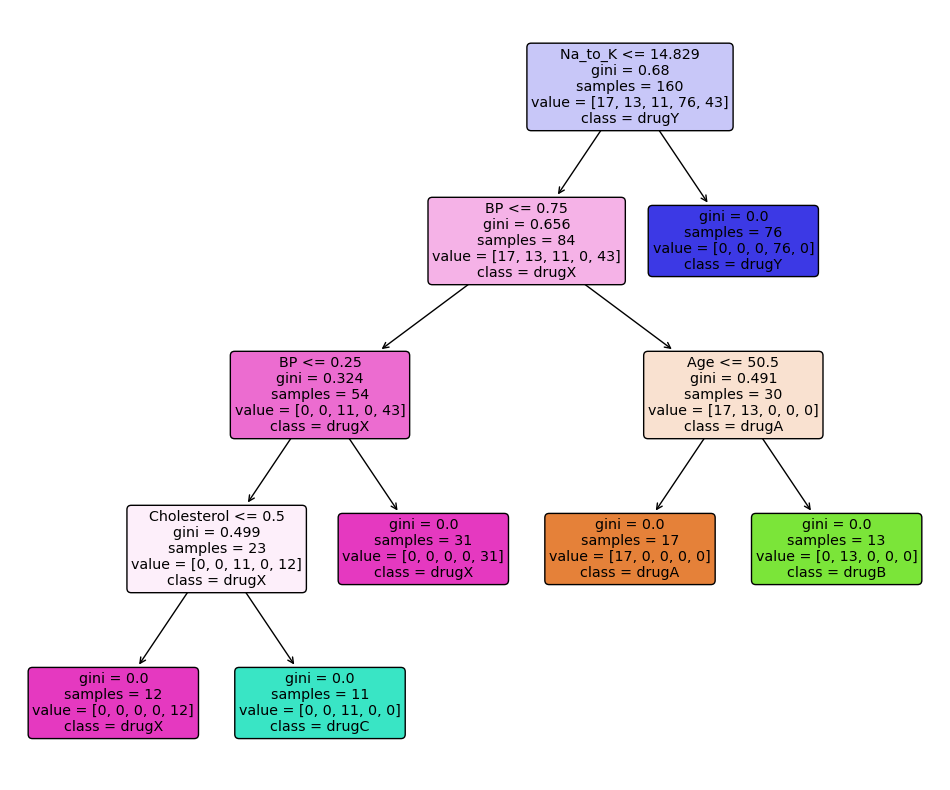

In [ ]:
#Plotting the tree

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=names, rounded=True)
plt.show()